In [1]:
##S3715555 – Vikas Virani

# load the twitter processing python class for use
%load_ext autoreload
%autoreload 1

# importing TwitterProcessing.py and its contents
%aimport TwitterProcessing

In [2]:
# importing packages and nltk data libraries
import string
import json
import codecs
import re
import numpy as np
import math
from collections import Counter

import pyLDAvis.sklearn
from wordcloud import WordCloud

from argparse import ArgumentParser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
#nltk.download('vader_lexicon')
nltk.download('wordnet')

from colorama import Fore, Back, Style
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\viran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
def vaderSentimentAnalysis(sTweetsFilename, bPrint, tweetProcessor, lemmatizer):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param sTweetsFilename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.
    @param lemmatizer: the lemmatizer from nltk to do lemmatization

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    negative = []
    positive = []
    
    # open file and process tweets, one by one
    with open(sTweetsFilename, 'r') as f:
        for line in f:
            # each line is loaded according to json format, into tweet, which is actually a dictionary
            tweet = json.loads(line)

            try:
                tweetText = tweet.get('full_text', '')
                tweetDate = tweet.get('created_at')
                # pre-process the tweet text
                lTokens = tweetProcessor.process(tweetText, lemmatizer)

                # this computes the sentiment scores (called polarity score in nltk)
                dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

                # save the date and sentiment of each tweet (used for time series)
                lSentiment.append([pd.to_datetime(tweetDate), dSentimentScores['compound']])
                
                negative.append(dSentimentScores['neg'])
                positive.append(dSentimentScores['pos'])
                
                # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
                # of positive and negative words, we cannot use colorama to label each token
                if bPrint:
                    print(*lTokens, sep=', ')
                    for cat,score in dSentimentScores.items():
                        print('{0}: {1}, '.format(cat, score), end='')
                    print()

            except KeyError as e:
                pass


    return lSentiment, negative, positive

In [4]:
"""
The part of the notebook that will run the method defined before to do sentiment analysis.
"""

# arguments for this notebook

# input file of set of tweets (json format)
tweetsFile = 'tweets.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True

# construct the tweet pro-processing object
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']

# call the TwitterProcessing python script
tweetProcessor = TwitterProcessing.TwitterProcessing(tweetTokenizer, lStopwords)

# using WordNetLemmatizer from nltk for lemmatization of words
lemmatizer = WordNetLemmatizer()

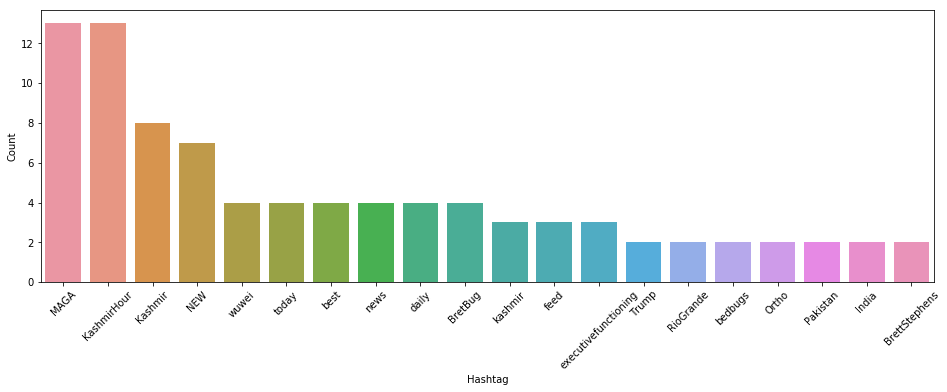

In [5]:
HashTags = []

# open file and process tweets, one by one
with open(tweetsFile, 'r') as f:
    for line in f:
        # each line is loaded according to json format, into tweet, which is actually a dictionary
        tweet = json.loads(line)
        
        if len(tweet['entities']['hashtags']) > 0:
            for ht in tweet['entities']['hashtags']:
                HashTags.append(ht['text'])
                #print(ht['text'])

counts = nltk.FreqDist(HashTags)
d = pd.DataFrame({'Hashtag': list(counts.keys()),
                  'Count': list(counts.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
# compute the sentiment
lSentiment = []

lSentiment, negative, positive = vaderSentimentAnalysis(tweetsFile, flagPrint, tweetProcessor, lemmatizer)

lawyer, michael, flynn, recycled, unfounded, conspiratorial, accusation, last-ditch, bid, delay, sentencing
neg: 0.424, neu: 0.576, pos: 0.0, compound: -0.5994, 
cruelty, point, administration, evangelicals, support, disgraceful, man, beyond, sic
neg: 0.287, neu: 0.515, pos: 0.199, compound: -0.296, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
published, trash, friday, night, holiday, weekend, ’, tweet, link, right, embarrassed, bret, stephen, gray, lady, ’, reputation, already, trash
neg: 0.124, neu: 0.743, pos: 0.134, compound: 0.0516, 
let, underscore, reprehensible, trump's, rollback, methane, emission, standard, bad, e
neg: 0.304, neu: 0.696, pos: 0.0, compound: -0.5423, 
let, underscore, reprehensible, trump's, rollback, methane, emission, standard, bad, e
neg: 0.304, neu: 0.696, pos: 0.0, compound: -0.5423, 
hi, thought, comeback, insult, received, 2005, submit, column, w9, form
neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.5106, 
opinion, new, york, time
neg: 0.0, neu: 1.0,

please, see
neg: 0.0, neu: 0.303, pos: 0.697, compound: 0.3182, 
methane, pose, threat, atmosphere, even, major, oil, company, calling, trump, tighten, regulation
neg: 0.236, neu: 0.764, pos: 0.0, compound: -0.5267, 
deported, white, trump, cruelty, seems, line, w, nazi, killing, pe
neg: 0.542, neu: 0.458, pos: 0.0, compound: -0.8519, 
saw, piece, isabel, usf, hospital, beyond, disgusted, writing, congressman
neg: 0.298, neu: 0.702, pos: 0.0, compound: -0.5267, 
followed, bret, ’, link
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
indian, occupied, #kashmir, nytimes, report, tension, kashmir, rise, india, tightens, security
neg: 0.168, neu: 0.657, pos: 0.175, compound: 0.0258, 
dr, john, gartner, duty, warn, cited, gail, collins, ny, time, trump, ’, cognitive, deterioration
neg: 0.104, neu: 0.896, pos: 0.0, compound: -0.1027, 
man, trump, wish
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
he's, pursuing, high-profile, vendetta, private, citizen, effort, get, fire
neg: 0.231, neu

often, perception, teen, need, figure, thing, completely, #executivefunctioning
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dirigible, need, refilling, hoping, hook, one, op-ed, columnist
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.4215, 
obstructed, justice, crook, whole, life, fuck, stupid, email, trump, suck, putin, ’, dick
neg: 0.557, neu: 0.298, pos: 0.145, compound: -0.8658, 
sayin, ’, 😂, 😂, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
practical, matter, marxism, revolves, around, three, objective, destruction, private, property, destruction, family, destruction, christianity, least, modern, liberal, usa, le, destruction, private, property, marxist, ancestor
neg: 0.424, neu: 0.544, pos: 0.032, compound: -0.9403, 
ambassador, people, kashmir, going, expose, oppression, gross, human, right, violation, fascis
neg: 0.497, neu: 0.503, pos: 0.0, compound: -0.7845, 
siberia, first, female, mayor, build, national, profile
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nytimes, paid

previously, guy, seemed, unwilling, spend, two, second, thinking, germany, military, refl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
without, public, announcement, eliminated, “, deferred, action, ”, program, month, allowed, immigrant
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
film, different, “, upon, time, hollywood, ”, “, booksmart, ”, “, last, black, man, san, francisco, ”, follow, arc
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
anyway, whole, thing, entirely, insane, ’, completely, unsurprising, yet, absolutely, shocking, better, simply, disgraceful
neg: 0.312, neu: 0.522, pos: 0.166, compound: -0.4229, 
got, featured, article, new, york, time, written, photography
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dog, leaker
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
world, cant, ignore, kashmir, imran, khan, #kashmirhour
neg: 0.0, neu: 0.74, pos: 0.26, compound: 0.2755, 
time, think, we've, seen, depth, trump's, cruelty, towards, migrant, hit, new, low, deporting, people


neg: 0.275, neu: 0.417, pos: 0.308, compound: -0.2018, 
world, nothing, stop, indian, assault, kashmir, people, two, nuclear-armed, state, get, ever, clos
neg: 0.0, neu: 0.689, pos: 0.311, compound: 0.6072, 
let, underscore, reprehensible, trump's, rollback, methane, emission, standard, bad, e
neg: 0.304, neu: 0.696, pos: 0.0, compound: -0.5423, 
congrats, inspiring, amazing, column, end-all, be-all, ludicrous, likely, expens
neg: 0.143, neu: 0.286, pos: 0.571, compound: 0.8176, 
know, allowed, use, new, york, time, editorial, page, amount, inside, joke, signal
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
guess, missed
neg: 0.688, neu: 0.312, pos: 0.0, compound: -0.296, 
someone, anyone, publicize, need, help, step, brother, uncle, family, killed, parent, plz, help
neg: 0.223, neu: 0.446, pos: 0.332, compound: 0.0516, 
opinion, new, york, time
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
trump, ’, white, house, one, unlike, one, cardinal, rule, seems, still, apply, ’, talk, pre

neg: 0.245, neu: 0.629, pos: 0.126, compound: -0.4404, 
followed, bret, ’, link
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
let, underscore, reprehensible, trump's, rollback, methane, emission, standard, bad, e
neg: 0.304, neu: 0.696, pos: 0.0, compound: -0.5423, 
people, going, die
neg: 0.661, neu: 0.339, pos: 0.0, compound: -0.5994, 
#new, 5, men, accused, plotting, 9/11, terror, attack, begin, trial, january, 2021, man, face, death, pe
neg: 0.534, neu: 0.466, pos: 0.0, compound: -0.9118, 
demanding, uscis, reverse, inhumane, policy, end, medical, deferred, action, protection, immigrant, facing, life-threatenin
neg: 0.137, neu: 0.863, pos: 0.0, compound: -0.2263, 
without, notice, trump, administration, eliminated, program, allowed, immigrant, avoid, deportation
neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.296, 
yeah, ’, think, ’, changed
neg: 0.0, neu: 0.476, pos: 0.524, compound: 0.296, 
let, underscore, reprehensible, trump's, rollback, methane, emission, standard, bad, e
neg:

people, going, die
neg: 0.661, neu: 0.339, pos: 0.0, compound: -0.5994, 
bret, stephen, apparently, googled, jew, bedbug, even, bother, checking, source, fucking, pu
neg: 0.324, neu: 0.676, pos: 0.0, compound: -0.5849, 
let, underscore, reprehensible, trump's, rollback, methane, emission, standard, bad, e
neg: 0.304, neu: 0.696, pos: 0.0, compound: -0.5423, 
time, think, we've, seen, depth, trump's, cruelty, towards, migrant, hit, new, low, deporting, people
neg: 0.333, neu: 0.667, pos: 0.0, compound: -0.7184, 
foreign, journalist, barred, entering, kashmir, according, report, indian, medium, security, force, set
neg: 0.0, neu: 0.821, pos: 0.179, compound: 0.34, 
’, woman, working, ’, caring, parent, #alzheimers, #deme
neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.4939, 
obama's, apostle, treason, comey, obama's, hand, picked, nodding, donkey, go, history, c
neg: 0.192, neu: 0.596, pos: 0.212, compound: 0.0772, 
followed, bret, ’, link
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
valeri

write, blatant, agenda, driven, half, truth, #article370, #kashmir
neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.3182, 
bret, stephen, written, numerous, column, defending, joe, biden, #saynotojoe, #bretbug
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
foreign, journalist, barred, entering, kashmir, according, report, indian, medium, security, force, set
neg: 0.0, neu: 0.821, pos: 0.179, compound: 0.34, 
congrats, inspiring, amazing, column, end-all, be-all, ludicrous, likely, expens
neg: 0.143, neu: 0.286, pos: 0.571, compound: 0.8176, 
“, ’, read, hundred, book, functionally, illiterate, incompetent, personal
neg: 0.341, neu: 0.659, pos: 0.0, compound: -0.4767, 
house, dccc, taking, campaign, donation, russian, mafia, chooses, go, bedbug, stephen, mast
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
beijing, ’, hong, kong, strategy, arrest, concession, new, york, time
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.34, 
followed, bret, ’, link
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0

world, can't, ignore, #kashmir, danger, opinion, prime, minister, #kashmirhour, #pak
neg: 0.0, neu: 0.621, pos: 0.379, compound: 0.5975, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
new, potus, ambivilant, firing, madeleine, westerhout, despite, fact, shared, private, information, son
neg: 0.307, neu: 0.693, pos: 0.0, compound: -0.5324, 
people, going, die
neg: 0.661, neu: 0.339, pos: 0.0, compound: -0.5994, 
know, allowed, use, new, york, time, editorial, page, amount, inside, joke, signal
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
talking, head, spent, entire, day, pushing, narrative, ’, gaffe, “, part, charm
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4019, 
time, think, we've, seen, depth, trump's, cruelty, towards, migrant, hit, new, low, deporting, people
neg: 0.333, neu: 0.667, pos: 0.0, compound: -0.7184, 
betrayal, president, trump's, closest, personal, aide, discovered, working, secretly, new, york, times's, maggie, haberman, sur
neg: 0.213, neu: 0.787, pos: 0.0

know, allowed, use, new, york, time, editorial, page, amount, inside, joke, signal
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
would, target, child, family, treated, serious, illness, like, cancer, cerebral, palsy, cy
neg: 0.444, neu: 0.423, pos: 0.132, compound: -0.7096, 
time, think, we've, seen, depth, trump's, cruelty, towards, migrant, hit, new, low, deporting, people
neg: 0.333, neu: 0.667, pos: 0.0, compound: -0.7184, 
valerie, harper, fame, emmy, ‘, rhoda, ’, dy, 80
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.4404, 
yang, futurist, among, conventionalists, bolshevik, future, course, already, yang, call, presentist, article, aug, 1, maybe, changed, mind, yang's, chance, winning, #andrewyang, #yanggang
neg: 0.0, neu: 0.779, pos: 0.221, compound: 0.6597, 
harvard, student, say, barred, u, friend, ’, social, medium, post
neg: 0.0, neu: 0.686, pos: 0.314, compound: 0.4939, 
without, notice, trump, administration, eliminated, program, allowed, immigrant, avoid, deportation


president, want, use, executive, order, end, birthright, citizenship
neg: 0.0, neu: 0.843, pos: 0.157, compound: 0.0772, 
editor, public, editor, people, like, bret, spew, lie, hate, unchecked, time, belief, hype
neg: 0.215, neu: 0.64, pos: 0.145, compound: -0.296, 
title, wrong, ”, trump, ’, personal, assistant, madeleine, westerhout, shared, detail, trump, said, family, ’, uncaring, asshole, ”, ⁦, ⁩, fixed, #trumplies, ⁦, ⁩, ⁦, ⁩
neg: 0.159, neu: 0.718, pos: 0.123, compound: -0.1779, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
marxist, attack, america, 1619, project, bad, enough, partnering, pulitzer, cent
neg: 0.452, neu: 0.548, pos: 0.0, compound: -0.765, 
trump, administration, ’, proposal, roll, back, methane, emission, rule, giant, wet, kiss, big, oil, dirty, pollut
neg: 0.155, neu: 0.695, pos: 0.15, compound: -0.0258, 
someone, anyone, publicize, need, help, step, brother, uncle, family, killed, parent, plz, help
neg: 0.223, neu: 0.446, pos: 0.332, compound: 0.0516, 
“, cry

ambassador, people, kashmir, going, expose, oppression, gross, human, right, violation, fascis
neg: 0.497, neu: 0.503, pos: 0.0, compound: -0.7845, 
bill, gate, mark, zuckerberg, may, started, company, 19, general, middle-aged, entrepreneur
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
followed, bret, ’, link
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
last, week, m, bueso, received, letter, told, would, face, deportation, leave, country, w, 33, day
neg: 0.091, neu: 0.909, pos: 0.0, compound: -0.0516, 
reducing, driving, 10, percent, would, cut, roughly, 110, million, metric, ton, carbon, dioxide, taking, abou
neg: 0.13, neu: 0.87, pos: 0.0, compound: -0.2732, 
le, 2, month, wrote, people, easily, offended, especially, social
neg: 0.192, neu: 0.577, pos: 0.231, compound: 0.1027, 
bit, gold, .., penny, chief, bootlicker, president, see, messianic, term, president, tweet, description, “, second, coming, god, ”
neg: 0.0, neu: 0.877, pos: 0.123, compound: 0.2732, 
time, think, we've, see

neg: 0.392, neu: 0.608, pos: 0.0, compound: -0.5448, 
well, ’, official, republican, arguing, u, ’, ’, democracy, believe
neg: 0.33, neu: 0.44, pos: 0.231, compound: -0.2263, 
time, think, we've, seen, depth, trump's, cruelty, towards, migrant, hit, new, low, deporting, people
neg: 0.333, neu: 0.667, pos: 0.0, compound: -0.7184, 
concerned, situation, kashmir, particularly, ongoing, communication, blackout, heard, constitue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
depraved, inhumane, trump, administration, must, allow, vulnerable, immigrant, stay, receive, treatment
neg: 0.148, neu: 0.703, pos: 0.148, compound: 0.0, 
sunk, far, one, tell, bret, stephen, drop, subject, get, dro
neg: 0.189, neu: 0.811, pos: 0.0, compound: -0.2732, 
stoner, college, kid, give, idea, like, try, patient, work, towards, conversation, ny, time, c
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.3612, 
white, house, sound, like, worst, place, work, ⁦
neg: 0.353, neu: 0.431, pos: 0.216, compound: -0.3818, 
ke

Distribution of Sentiments


,Overall Sentiment,Positive,Negative
count,1200.000000,1200.000000,1200.000000
mean,-0.114376,0.121348,0.175098
std,0.472949,0.166669,0.193961
min,-0.967000,0.000000,0.000000
25%,-0.542300,0.000000,0.000000
50%,0.000000,0.000000,0.143000
75%,0.275500,0.219000,0.333000
max,0.955100,1.000000,1.000000


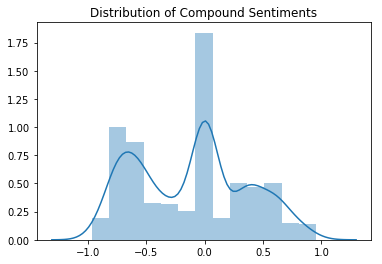

In [7]:
final_sent = []

for sentiment in lSentiment:
    #print(sentiment[1])
    final_sent.append(sentiment[1])

sentiment= Counter(final_sent)
#print(dict(sentiment).items())

#plt.bar(sentiment.keys(), sentiment.values())
d = pd.DataFrame(dict(sentiment).items(),columns=["Overall Sentiment","Count"])
#print(d)
ax = sns.distplot(final_sent)
ax.set_title("Distribution of Compound Sentiments")


print("Distribution of Sentiments")

fsent = pd.DataFrame({'Overall Sentiment': final_sent,
     'Positive': positive,
     'Negative': negative
    })
fsent.describe()

In [8]:
"""
Performs topic modelling on a twitter timeline.
"""

# this will store the list of tweets we read from timeline
lTweets = []
        
# open file and process tweets, one by one
with open(tweetsFile, 'r') as f:
    for line in f:
        # each line is loaded according to json format, into tweet, which is actually a dictionary
        tweet = json.loads(line)
        #print(tweet['full_text'])
        lTokens = tweetProcessor.process(tweet['full_text'], lemmatizer)
        lTweets.append(' '.join(lTokens))
    

In [9]:
#
# LDA parameters
#

# number of topics to discover
topicNum = 8
# maximum number of words to display per topic
wordNumToDisplay = 20
# this is the number of features/words to used to describe our documents
featureNum = 2000

In [10]:
"""
Performs counting via CountVectorizer and then apply the LDA model.
"""

#
# Count Vectorizer
#

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lTweets)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names()


#
# LDA MODEL
#

# Run LDA Model
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online',random_state=777).fit(tf)

In [11]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [12]:
#
# Diplays discovered topics
#

display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
time opinion new york different prime minister day end woman like column article need year know op want thing ed
Topic 1:
world khan imran people pakistan twitter kashmir column ignore true hong kong government month endorse mean act kashmirhour religion order
Topic 2:
action trump family deferred isabel area medical personal maria bueso immigrant assistant madeleine westerhout year talk btw difference bay incl
Topic 3:
stephen bret indian bedbug book read kashmir world stop assault illiterate great want state functionally mattis jew quote nyt called
Topic 4:
trump administration immigrant like family help child treatment need stay allow vulnerable inhumane receive depraved program allowed illness target step
Topic 5:
trump new time migrant people hit cruelty ve think deporting seen low depth let methane bad emission standard rollback reprehensible
Topic 6:
people going kashmir human right expose violation ambassador oppression fascis gross new time york use life die le know e

In [13]:
#
# pyLDAvis
#

panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\viran\Anaconda2\envs\Python 3.6\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [14]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(20,10))
    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='white')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

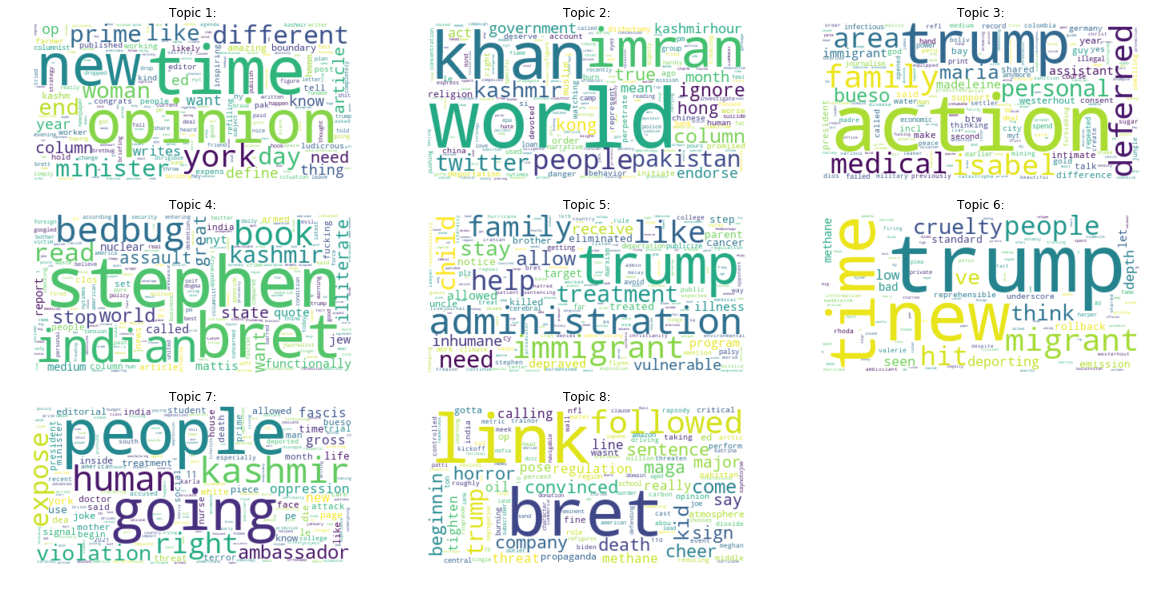

In [15]:
#
# Word Cloud
#

# display wordcloud
displayWordcloud(ldaModel, tfFeatureNames)